# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

##Not for Grading

# Comparision of various methods in Timeseries Analysis

## Time Series Models

In this experiment, we will build different  time-series forecasting models to get a forecast for Onion prices. 

Basic models: 

1. Mean Constant Model
2. Linear Trend Model
3. Random Walk Model

Advanced models:

1.   Simple Exponential Smoothing Model
2.   ARIMA Model
3.   Auto Regressive Smooting Model



#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A07E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234568" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="M2W7_CS_1_Timeseries_Analysis" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/Week6/MonthWiseMarketArrivals_Clean.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Casestudies_slides/Week6/ts_mlpr.joblib")
    ipython.magic("sx pip3 install statsmodels") 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [4]:
ls

M2W7_CS_1_Timeseries_Analysis.ipynb  sample_data/
M3W12_CS_1_SGDvsMomentum.ipynb       SGD_Nonconvex_2D.gif
MM_Nonconvex_2D.gif                  ts_mlpr.joblib
MonthWiseMarketArrivals_Clean.csv


In [5]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [0]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

### Preprocessing to get the tidy dataframe

In [0]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

In [0]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [0]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [0]:
cities, counts = np.unique(df.city.values, return_counts=True)

In [0]:
city = cities[np.argmax(counts)]

Get the priceMod for a Market

In [0]:
dfls = df.loc[df.city == city].copy()

In [14]:
dfls.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [0]:
# Drop redundant columns
dfls = dfls.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [16]:
dfls.head()

,quantity,priceMod,date
date,,,
1996-01,225063,226,1996-01-01
1996-02,196164,186,1996-02-01
1996-03,178992,243,1996-03-01
1996-04,192592,254,1996-04-01
1996-05,237574,269,1996-05-01


### Transformation - Log

Transformations such as logarithms can help to stabilize the variance of a time series. 


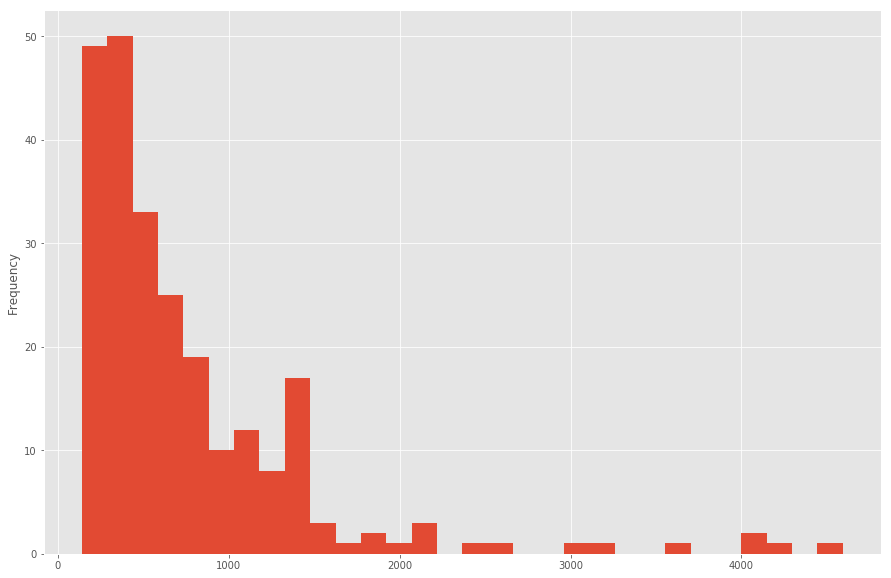

In [17]:
dfls.priceMod.plot(kind = "hist", bins = 30)

In [18]:
dfls['priceModLog'] = np.log(dfls.priceMod)
dfls.head()

,quantity,priceMod,date,priceModLog
date,,,,
1996-01,225063,226,1996-01-01,5.420535
1996-02,196164,186,1996-02-01,5.225747
1996-03,178992,243,1996-03-01,5.493061
1996-04,192592,254,1996-04-01,5.537334
1996-05,237574,269,1996-05-01,5.594711


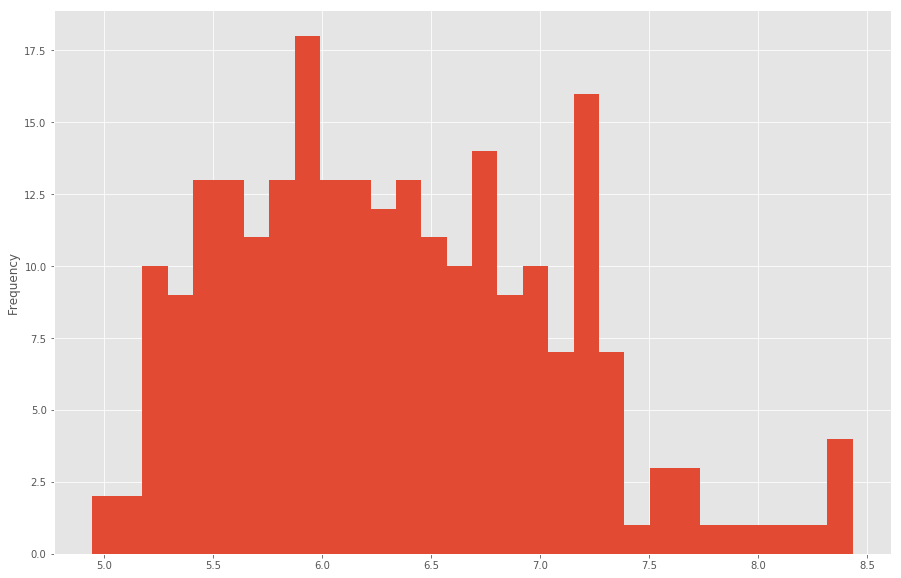

In [19]:
dfls.priceModLog.plot(kind = "hist", bins = 30)

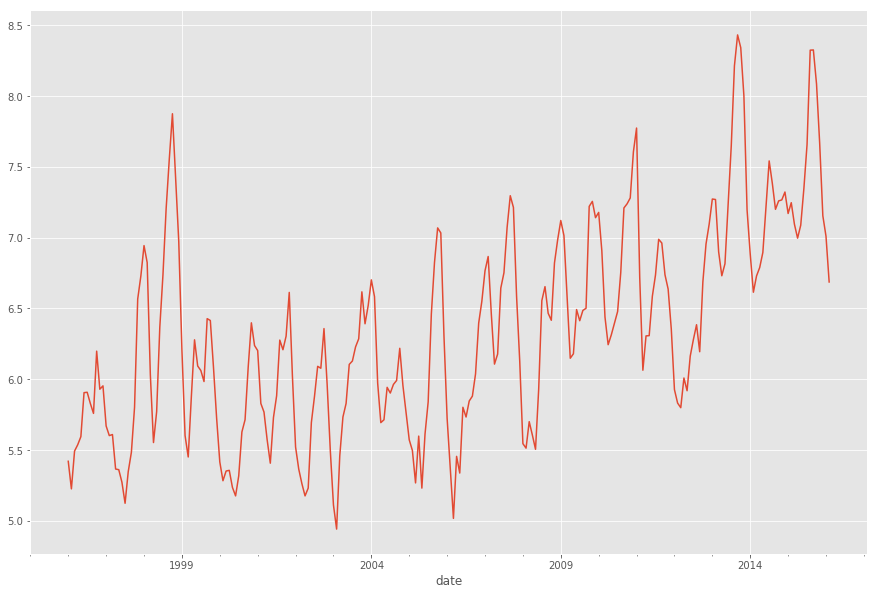

In [20]:
dfls.priceModLog.plot()



## Mean  Model

This very simple forecasting model will be called the "mean model"

In [0]:
model_mean_pred = dfls.priceModLog.mean()

In [0]:
# Let us store this as our Mean Predication Value
dfls["priceMean"] = np.exp(model_mean_pred)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


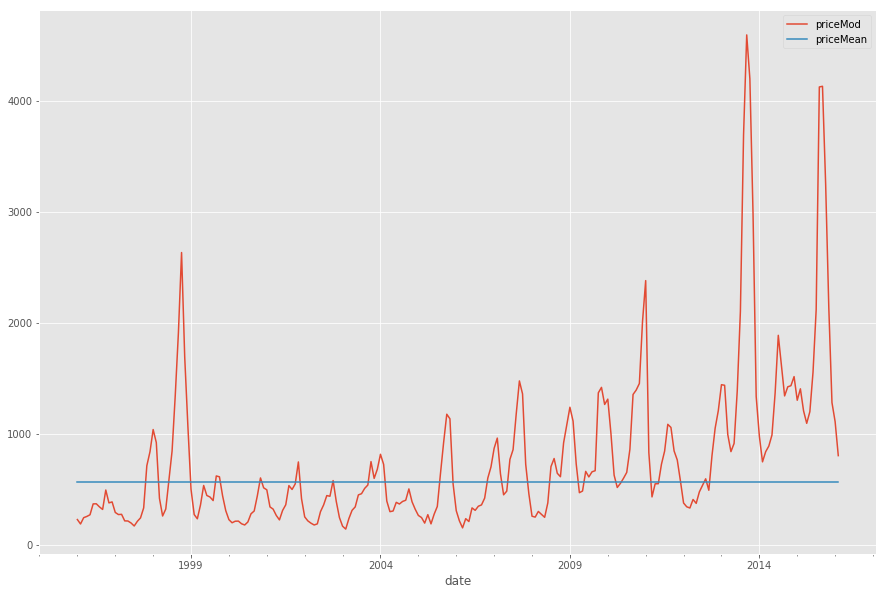

In [23]:
dfls.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

**Can we measure the error rate?**

We will use Root Mean Squared Error (RMSE) to calculate our error values

$RMSE = \Sigma \sqrt{ (\hat{y} - y)^2/n} $ , where $\hat{y}$ is  predicted value of y

In [0]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [25]:
model_mean_RMSE = RMSE(dfls.priceMean, dfls.priceMod)
model_mean_RMSE

739.7611298704511

In [26]:
# Save this in a dataframe
dflsResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dflsResults.head()

,Model,Forecast,RMSE


In [27]:
dflsResults.loc[0,"Model"] = "Mean"
dflsResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
dflsResults.loc[0,"RMSE"] = model_mean_RMSE
dflsResults.head()

,Model,Forecast,RMSE
0,Mean,564.668,739.761


## Linear Trend Model

Let us start by plotting a linear trend model between priceModLog and time.

However to do linear regression, we need a numeric indicator for time period - Let us create that.

In [28]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean
date,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286
1996-02,196164,186,1996-02-01,5.225747,564.668286
1996-03,178992,243,1996-03-01,5.493061,564.668286
1996-04,192592,254,1996-04-01,5.537334,564.668286
1996-05,237574,269,1996-05-01,5.594711,564.668286


In [29]:
dfls.dtypes

quantity                int64
priceMod                int64
date           datetime64[ns]
priceModLog           float64
priceMean             float64
dtype: object

In [30]:
# What is the starting month of our data
dfls.date.min()

Timestamp('1996-01-01 00:00:00')

In [0]:
# Convert date in datetimedelta figure starting from zero
dfls["timeIndex"] = dfls.date - dfls.date.min()

In [0]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
date,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0 days
1996-02,196164,186,1996-02-01,5.225747,564.668286,31 days
1996-03,178992,243,1996-03-01,5.493061,564.668286,60 days
1996-04,192592,254,1996-04-01,5.537334,564.668286,91 days
1996-05,237574,269,1996-05-01,5.594711,564.668286,121 days


In [0]:
dfls.dtypes

quantity                 int64
priceMod                 int64
date            datetime64[ns]
priceModLog            float64
priceMean              float64
timeIndex      timedelta64[ns]
dtype: object

In [0]:
# Convert to months using the timedelta function
dfls["timeIndex"] =  dfls["timeIndex"]/np.timedelta64(1, 'M')

In [0]:
dfls.timeIndex.head()

date
1996-01    0.000000
1996-02    1.018501
1996-03    1.971293
1996-04    2.989794
1996-05    3.975441
Freq: M, Name: timeIndex, dtype: float64

In [0]:
# Round the number to 0
dfls["timeIndex"] = dfls["timeIndex"].round(0).astype(int)

In [0]:
## Now plot linear regression between priceMod and timeIndex
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfls).fit()

In [0]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.11e-26
Time:                        07:08:50   Log-Likelihood:                -211.65
No. Observations:                 242   AIC:                             427.3
Df Residuals:                     240   BIC:                             434.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5535      0.075     74.369      0.000       5.406       5.701
timeIndex      0.0065      0.001     12.116      0.000       0.005       0.008
==============================================================================
Omnibus:                       14.972   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.359
Skew:                           0.552   Prob(JB):                     0.000280
Kurtosis:                       3.636   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
## Parameters for y = mx + c equation
model_linear.params
m = model_linear.params[0]
c = model_linear.params[1]

In [0]:
model_linear_pred = model_linear.predict()

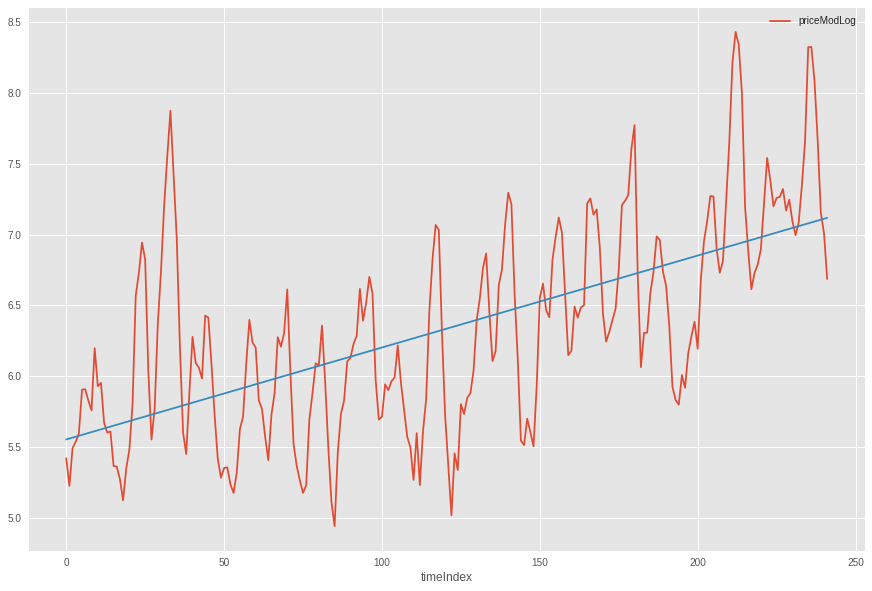

In [0]:
# Plot the prediction line
dfls.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfls.timeIndex,model_linear_pred, '-')

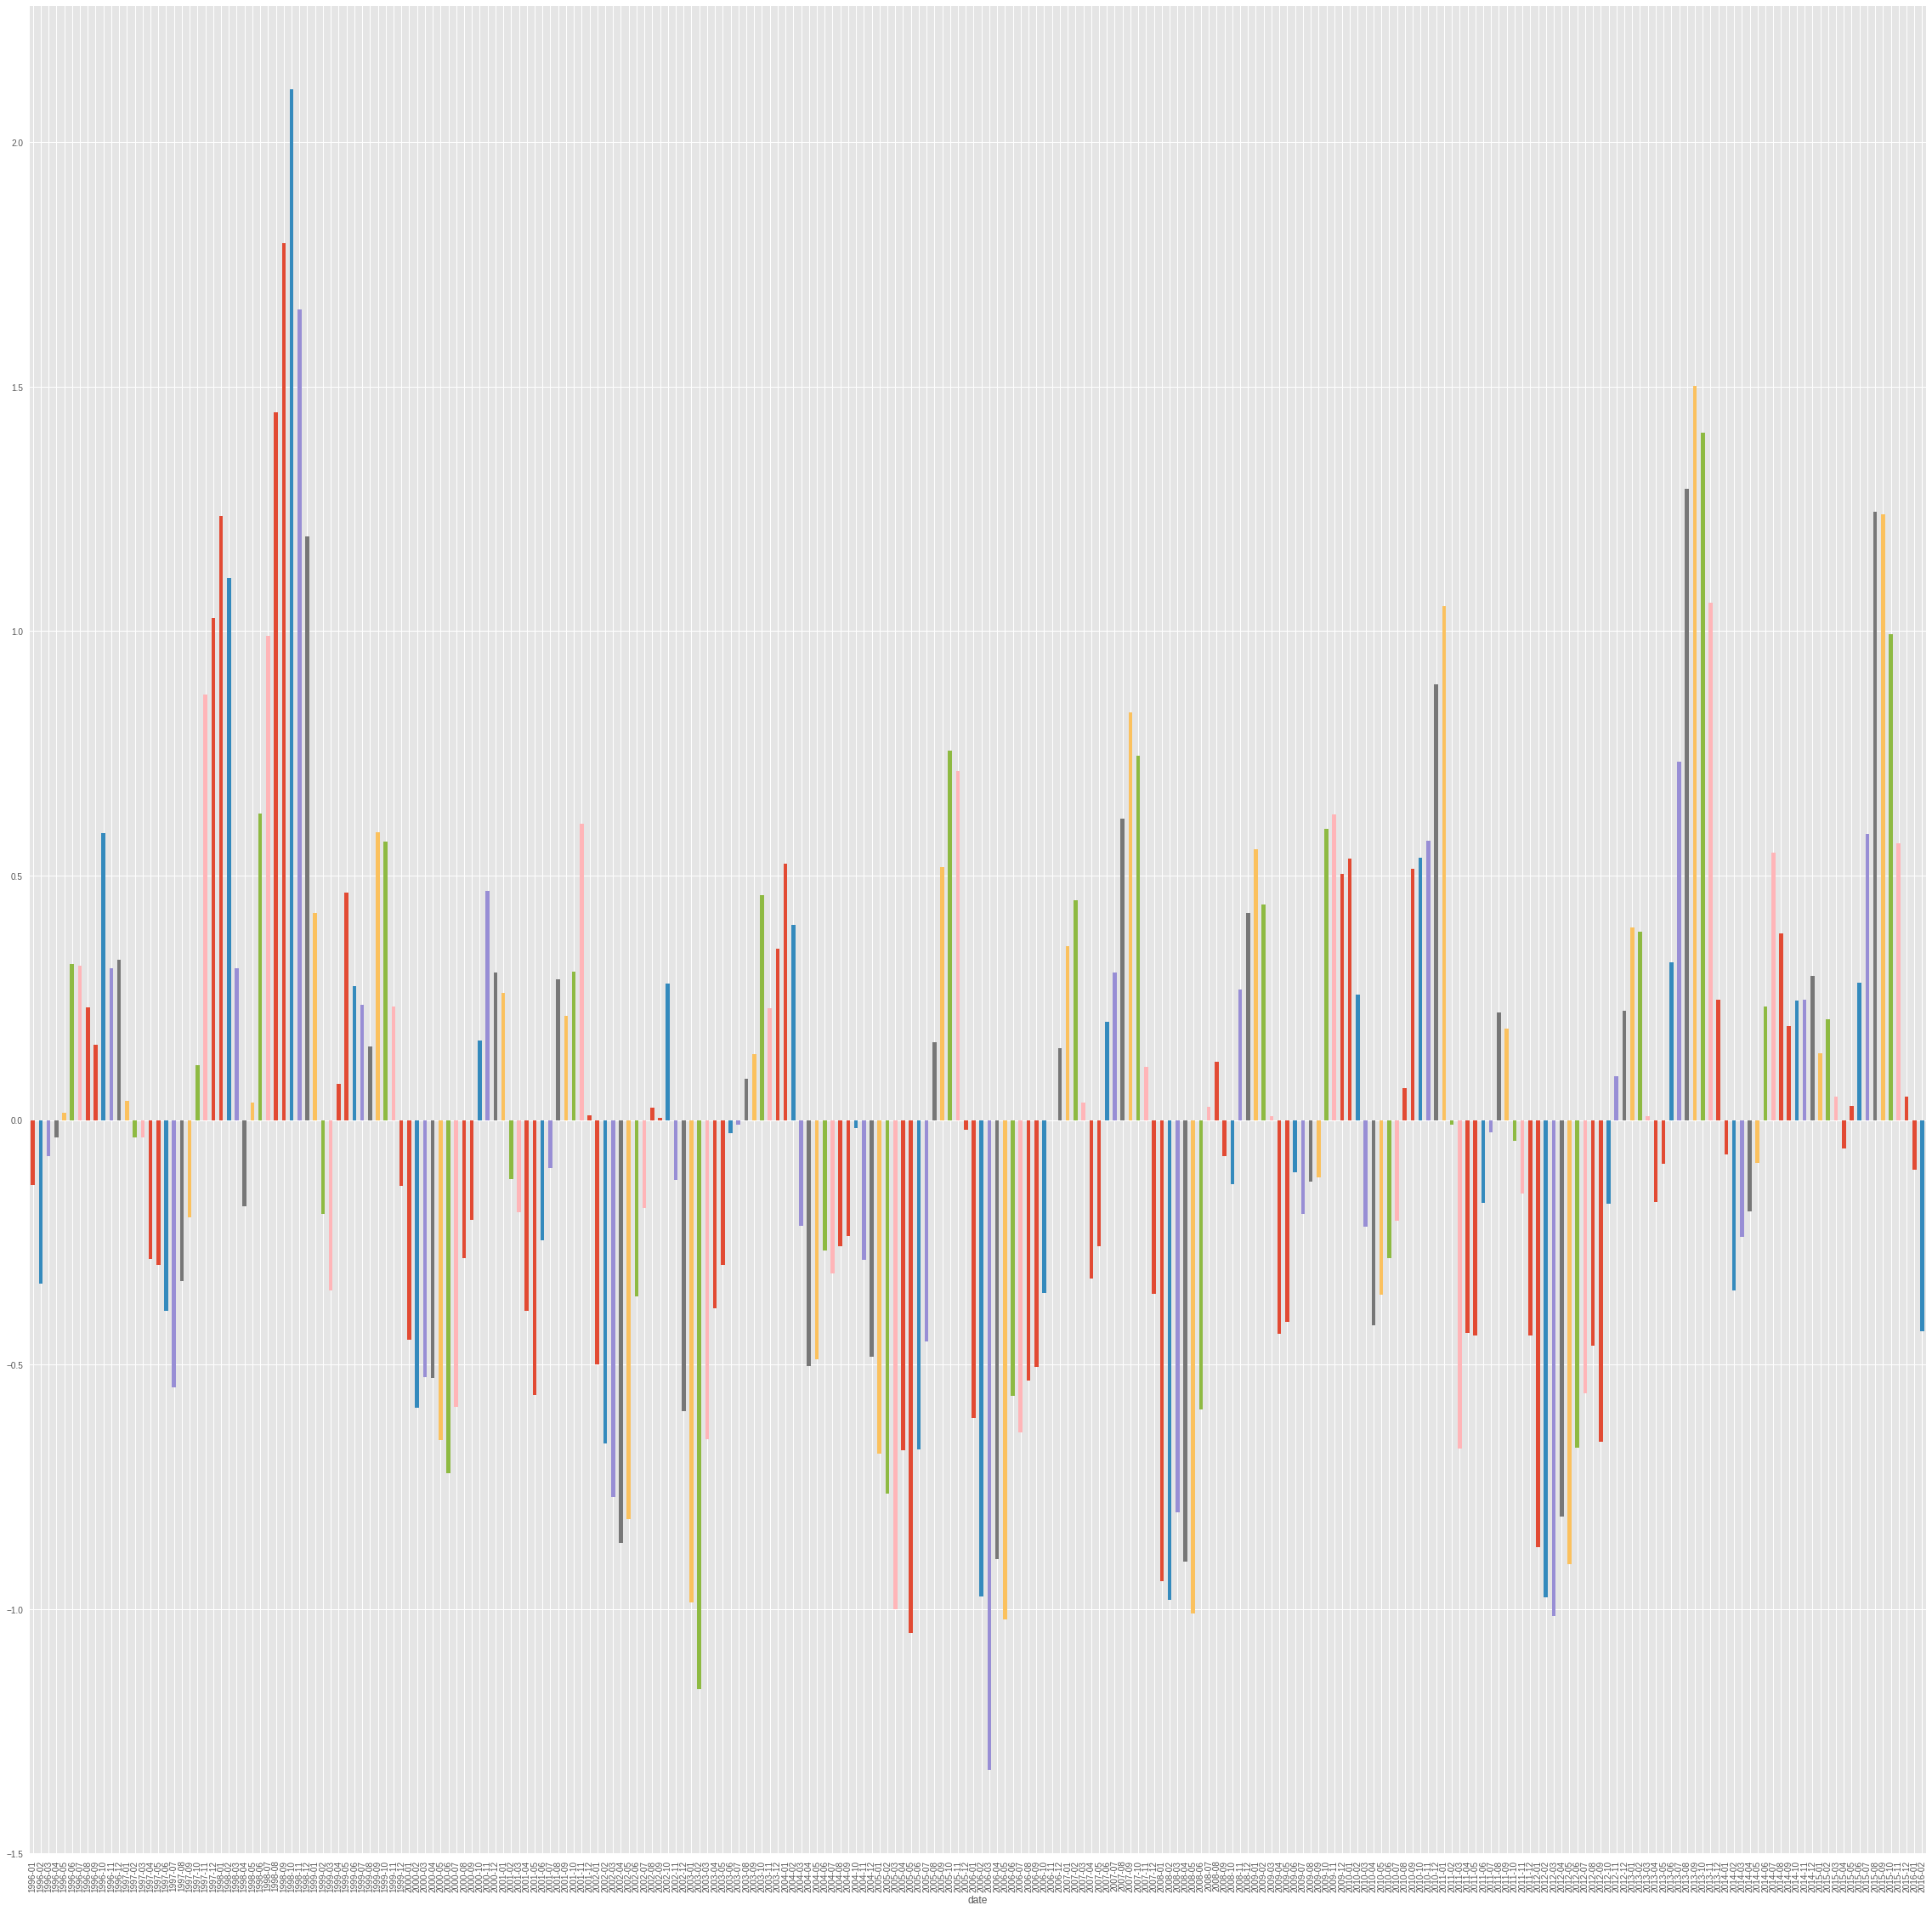

In [0]:
model_linear.resid.plot(kind = "bar", figsize=(40, 40))

**Is this a good model?**

What measures can we check to see if the model is good?

It is seen here (and  also evident on the regression line plot, if you look closely) that the linear trend model has a tendency to make an error of the same sign for many periods in a row. This tendency is measured in statistical terms by the **lag-1 autocorrelation and Durbin-Watson statistic**.  If there is no time pattern, the lag-1 autocorrelation should be very close to zero, and the Durbin-Watson statistic ought to be very close to 2, which is not the case here.  If the model has succeeded in extracting all the "signal" from the data, there should be no pattern at all in the errors: the error in the next period should not be correlated with any previous errors. The linear trend model obviously fails the autocorrelation test in this case.


In [0]:
# Manual Calculation
model_linear_forecast_manual = m * 146 + c
model_linear_forecast_manual

810.8140232961191

In [0]:
dfls["priceLinear"] = np.exp(model_linear_pred)

In [0]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear
date,,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325
1996-02,196164,186,1996-02-01,5.225747,564.668286,1,259.815605
1996-03,178992,243,1996-03-01,5.493061,564.668286,2,261.508848
1996-04,192592,254,1996-04-01,5.537334,564.668286,3,263.213127
1996-05,237574,269,1996-05-01,5.594711,564.668286,4,264.928512


In [0]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(dfls.priceLinear, dfls.priceMod)
model_linear_RMSE

613.3247959007717

In [0]:
#Storing the results
dflsResults.loc[1,"Model"] = "Linear"
dflsResults.loc[1,"Forecast"] = np.exp(model_linear_forecast_manual)
dflsResults.loc[1,"RMSE"] = model_linear_RMSE
dflsResults.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,Model,Forecast,RMSE
0,Mean,564.668,739.761
1,Linear,inf,613.325


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


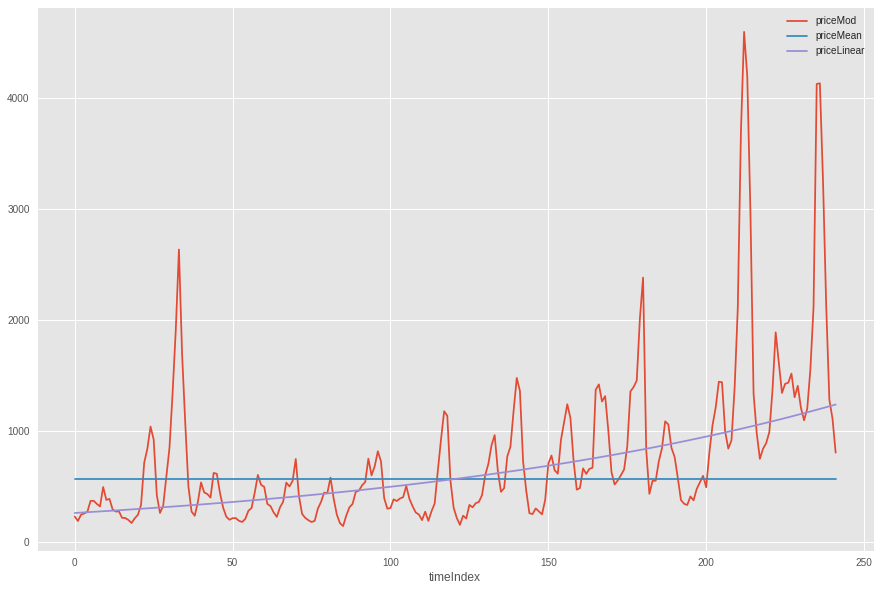

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear"])

## Linear Model with Regressor

In [0]:
## Now plot linear regression between priceMod and timeIndex
model_linear_quantity = smf.ols('priceModLog ~ timeIndex + np.log(quantity)', data = dfls).fit()

In [0]:
model_linear_quantity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.45e-43
Time:                        07:09:19   Log-Likelihood:                -169.53
No. Observations:                 242   AIC:                             345.1
Df Residuals:                     239   BIC:                             355.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.5369      0.803     16.864      0.000      11.956      15.118
timeIndex            0.0074      0.000     16.036      0.000       0.006       0.008
np.log(quantity)    -0.6578      0.066     -9.976      0.000      -0.788      -0.528
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.044
Skew:                           0.182   Prob(JB):                        0.218
Kurtosis:                       2.589   Cond. No.                     3.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
dfls["priceLinearQuantity"] = np.exp(model_linear_quantity.predict())

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


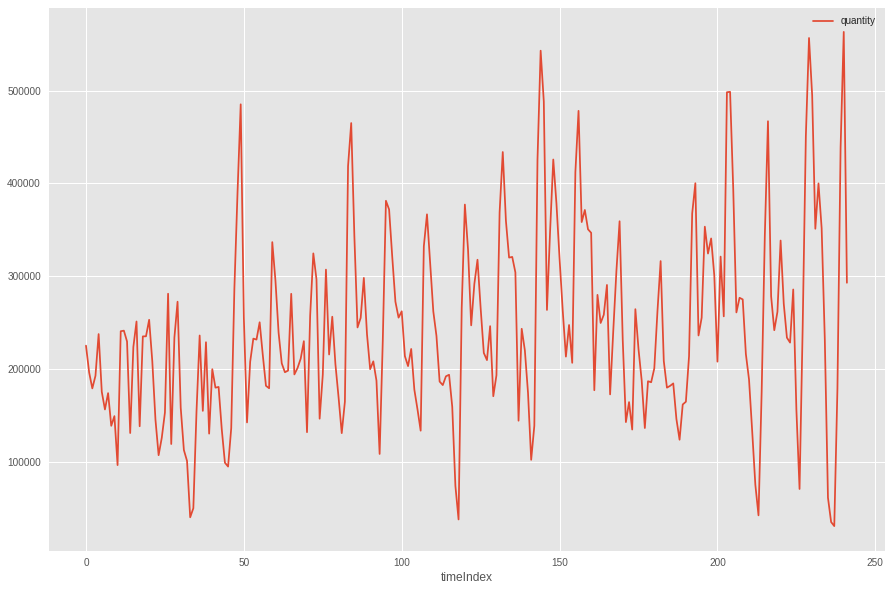

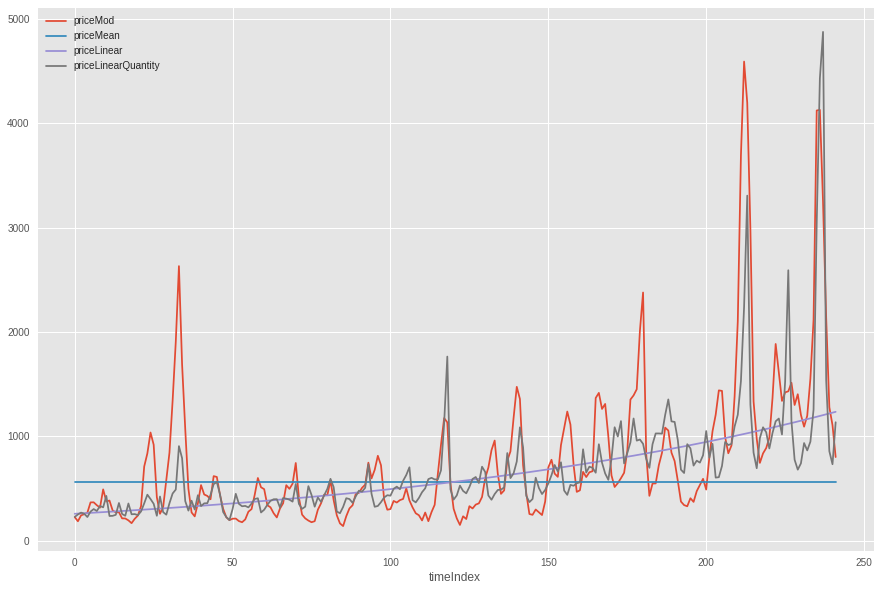

In [0]:
dfls.plot(kind = "line", x="timeIndex", y = "quantity")
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", 
                                             "priceLinear", "priceLinearQuantity"])

## Random Walk Model

When faced with a time series that shows irregular growth, the best strategy may not be to try to directly predict the level of the series at each period (i.e., the quantity Yt). Instead, it may be better to try to predict the change that occurs from one period to the next (i.e., the quantity Yt - Yt-1). That is, it may be better to look at the first difference of the series, to see if a predictable pattern can be found there. For purposes of one-period-ahead forecasting, it is just as good to predict the next change as to predict the next level of the series, since the predicted change can be added to the current level to yield a predicted level. The simplest case of such a model is one that always predicts that the next change will be zero, as if the series is equally likely to go up or down in the next period regardless of what it has done in the past.


**Random Walk Model** $ \hat{Y_t} = Y_{t-1} + \epsilon \\$

**Random Walk Model with drift** $$ \hat{Y_t} = Y_{t-1} + c + \epsilon \\$$

In [0]:
dfls["priceModLogShift1"] = dfls.priceModLog.shift()

In [0]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity,priceModLogShift1
date,,,,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325,228.226599,NaN
1996-02,196164,186,1996-02-01,5.225747,564.668286,1,259.815605,251.668457,5.420535
1996-03,178992,243,1996-03-01,5.493061,564.668286,2,261.508848,269.278771,5.225747
1996-04,192592,254,1996-04-01,5.537334,564.668286,3,263.213127,258.514492,5.493061
1996-05,237574,269,1996-05-01,5.594711,564.668286,4,264.928512,226.842567,5.537334


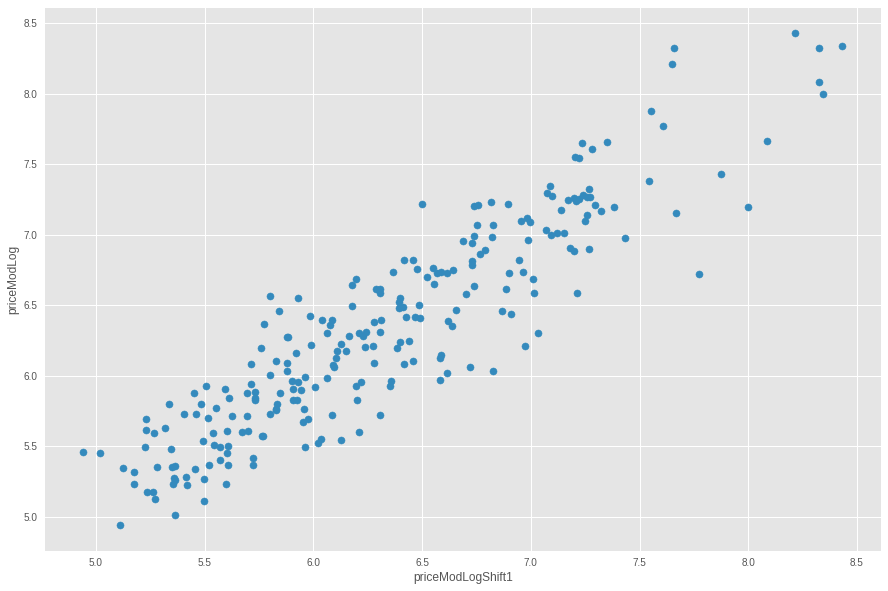

In [0]:
dfls.plot(kind= "scatter", y = "priceModLog", x = "priceModLogShift1", s = 50)

In [0]:
# Lets plot the one-month difference curve
dfls["priceModLogDiff"] = dfls.priceModLog - dfls.priceModLogShift1

In [0]:
dfls["priceRandom"] = np.exp(dfls.priceModLogShift1)
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity,priceModLogShift1,priceModLogDiff,priceRandom
date,,,,,,,,,,,
1996-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325,228.226599,NaN,NaN,NaN
1996-02,196164,186,1996-02-01,5.225747,564.668286,1,259.815605,251.668457,5.420535,-0.194788,226.0
1996-03,178992,243,1996-03-01,5.493061,564.668286,2,261.508848,269.278771,5.225747,0.267315,186.0
1996-04,192592,254,1996-04-01,5.537334,564.668286,3,263.213127,258.514492,5.493061,0.044273,243.0
1996-05,237574,269,1996-05-01,5.594711,564.668286,4,264.928512,226.842567,5.537334,0.057377,254.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


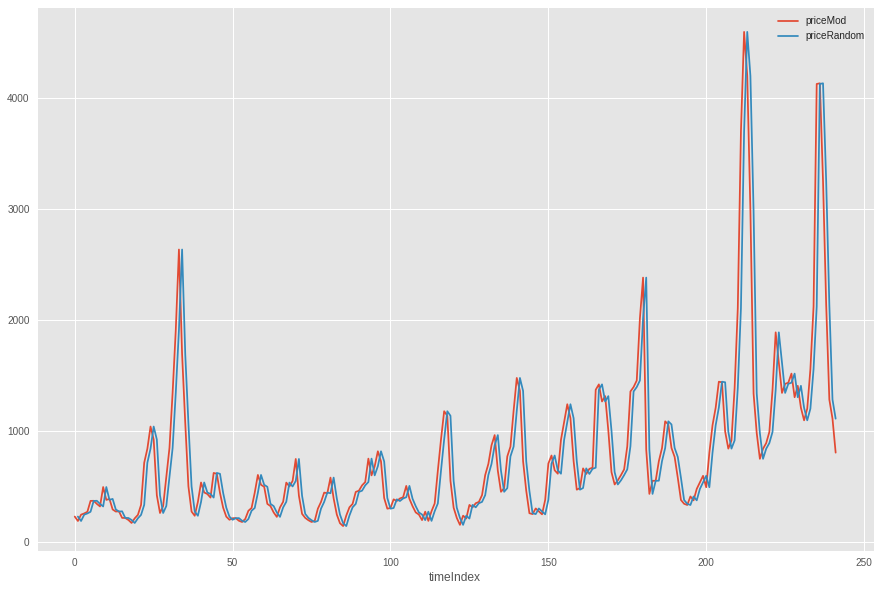

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod","priceRandom"])

In [0]:
# Root Mean Squared Error (RMSE)
model_random_RMSE = RMSE(dfls.priceRandom, dfls.priceMod)
model_random_RMSE

341.53638713091726

In [0]:
dflsResults.loc[2,"Model"] = "Random"
dflsResults.loc[2,"Forecast"] = np.exp(dfls.priceModLogShift1[-1])
dflsResults.loc[2,"RMSE"] = model_random_RMSE
dflsResults.head()

,Model,Forecast,RMSE
0,Mean,564.668,739.761
1,Linear,inf,613.325
2,Random,1108,341.536


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


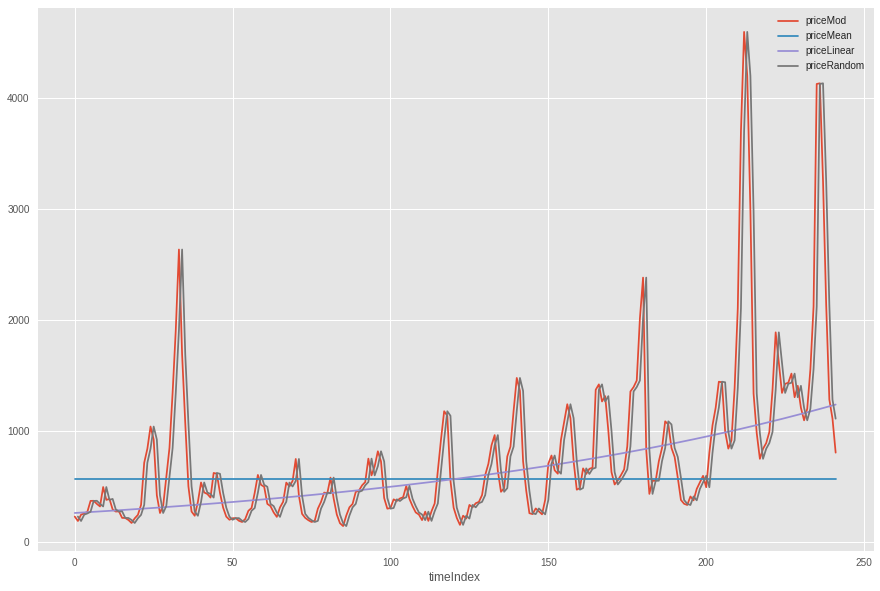

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom"])

## Advanced Model

Most of the time series models work on the assumption that the time series is stationary. Intuitively, we can see that if a time series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series

**Statistical stationarity**: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! 

There are three basic criterion for a series to be classified as stationary series :

- The mean of the series should not be a function of time rather should be a constant. 

![](img/Mean_nonstationary.png)

- The variance of the series should not a be a function of time. This property is known as homoscedasticity.

![](img/Var_nonstationary.png)

- The covariance of the i th term and the (i + m) th term should not be a function of time.

![](img/Cov_nonstationary.png)

### How do we check for Stationarity in a series? 

- **Plotting Rolling Statistics**: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
- **Dickey-Fuller Test**: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

###  Augmented Dickey Fuller Test of Stationarity

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

$$ Y_t = \rho * Y_{t-1} + \epsilon_t \\$$
$$  Y_t - Y_{t-1} = (\rho - 1) Y_{t - 1} + \epsilon_t \\$$

We have to test if p – 1 is significantly different than zero or not. If the null hypothesis gets rejected, we’ll get a stationary time series.

In [0]:
def adf(ts):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=12)
    rolstd = pd.rolling_std(ts, window=12)

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

## How to make a Time Series Stationary?

Lets understand what is making a time series non-stationary. There are 3 major reasons behind non-stationarity:

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend “changing direction” when it might go from an increasing trend to a decreasing trend.
- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.
- **Cyclic**: A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years.

$$ y_t=S_t+T_t+E_t \\$$

where $y_t$ is the data at period `t`, $S_t$ is the seasonal component at period 't', $T_t$ is the trend-cycle component at period tt and $E_t$ is the remainder (or irregular or error) component at period tt. 

Alternatively, a multiplicative model would be written as

$$ y_t=S_t*T_t*E_t \\$$

The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. With economic time series, multiplicative models are common.

An alternative to using a multiplicative model, is to first transform the data until the variation in the series appears to be stable over time, and then use an additive model. When a log transformation has been used, this is equivalent to using a multiplicative decomposition because

$$ log y_t=log S_t+ log T_t + log E_t \\$$

Sometimes, the trend-cycle component is simply called the “trend” component, even though it may contain cyclic behaviour as well.


## Forecasting Steps 

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

## Estimating and Eliminating Trend

1. Transformation - Take a log, sqrt, cuberoot etc. transformation
2. Aggregation – taking average for a time period like monthly/weekly averages
3. Smoothing – taking rolling averages, exponential smoothing
4. Polynomial Fitting – fit a regression model

## Simple Moving Average 

As a first step in moving beyond mean models, random walk model and linear trend models, nonseasonal patterns and trends can be extrapolated using a moving-average or smoothing model. The basic assumption behind averaging and smoothing models is that the time series is locally stationary with a slowly varying mean. Hence, we take a moving (local) average to estimate the current value of the mean and then use that as the forecast for the near future. This can be considered as a compromise between the mean model and the random-walk-without-drift-model. The same strategy can be used to estimate and extrapolate a local trend.  A moving average is often called a "smoothed" version of the original series because short-term averaging has the effect of smoothing out the bumps in the original series. By adjusting the degree of smoothing (the width of the moving average), we can hope to strike some kind of optimal balance between the performance of the mean and random walk models.

Simple Moving Average (SMA)

$$ \hat{y_t} = \frac{y_{t-1} + y_{t-2} + y_{t-3} + ... + y_{t-m}}{m} \\$$

In [0]:
# For smoothing the values we can use 12 month Moving Averages 
dfls['priceModLogMA12'] = pd.rolling_mean(dfls.priceModLog, window = 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


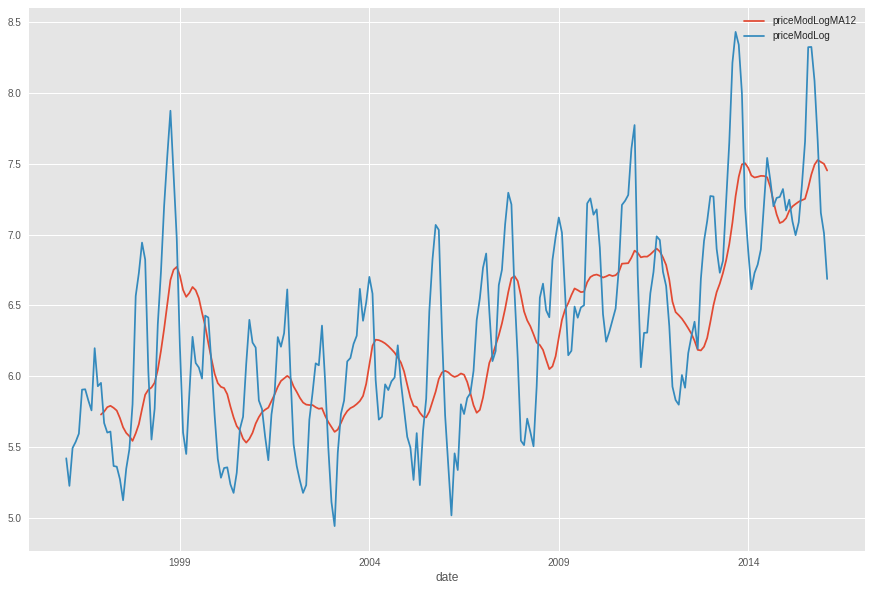

In [0]:
dfls.plot(kind ="line", y=["priceModLogMA12", "priceModLog"])

The long-term forecasts from the SMA model are a horizontal straight line, just as in the random walk model. Thus, the SMA model assumes that there is no trend in the data. However, whereas the forecasts from the random walk model are simply equal to the last observed value, the forecasts from the SMA model are equal to a weighted average of recent values.

    

In [0]:
dfls["priceMA12"] = np.exp(dfls.priceModLogMA12)
dfls.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12,priceMA12
date,,,,,,,,,,,,,
2015-10,30532,3248,2015-10-01,8.085795,564.668286,237,1203.533249,4877.213321,8.326033,-0.240238,4130.0,7.494224,1797.628481
2015-11,178713,2134,2015-11-01,7.665753,564.668286,238,1211.376792,1536.721884,8.085795,-0.420041,3248.0,7.527467,1858.392982
2015-12,438498,1280,2015-12-01,7.154615,564.668286,239,1219.271452,857.805689,7.665753,-0.511138,2134.0,7.513476,1832.572779
2016-01,563321,1108,2016-01-01,7.010312,564.668286,240,1227.217561,732.881049,7.154615,-0.144303,1280.0,7.500095,1808.213761
2016-02,292870,802,2016-02-01,6.687109,564.668286,241,1235.215457,1135.269599,7.010312,-0.323203,1108.0,7.453430,1725.773152


In [0]:
model_MA12_forecast = dfls.priceModLog.tail(12).mean()

In [0]:
# Root Mean Squared Error (RMSE)
model_MA12_RMSE = RMSE(dfls.priceMA12, dfls.priceMod)
model_MA12_RMSE

558.5437630687063

In [0]:
dflsResults.loc[3,"Model"] = "Moving Average 12"
dflsResults.loc[3,"Forecast"] = np.exp(model_MA12_forecast)
dflsResults.loc[3,"RMSE"] = model_MA12_RMSE
dflsResults.head()

,Model,Forecast,RMSE
0,Mean,564.668,739.761
1,Linear,inf,613.325
2,Random,1108,341.536
3,Moving Average 12,1725.77,558.544


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


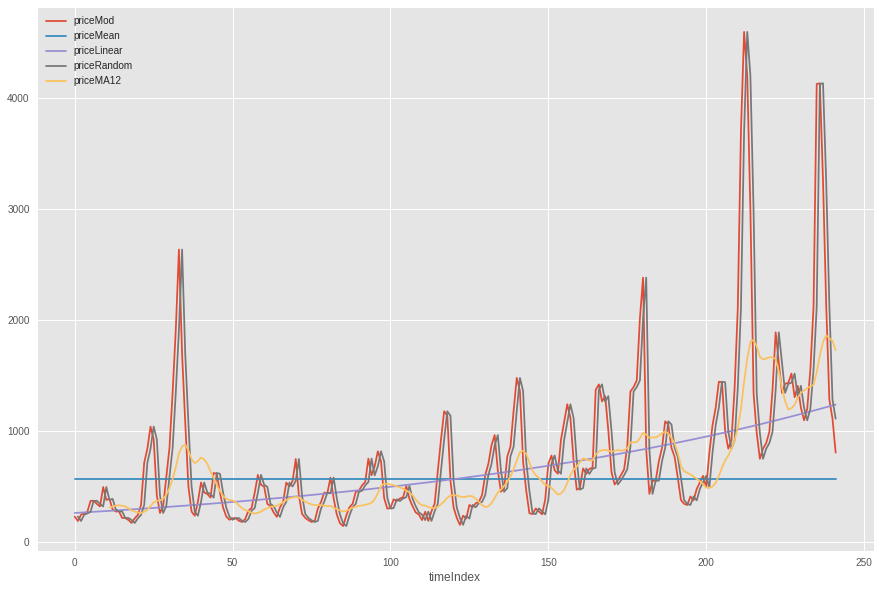

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear",
                                             "priceRandom", "priceMA12"])

In [0]:
# Test remaining part for Stationary
ts = dfls.priceModLog - dfls.priceModLogMA12
ts.dropna(inplace = True)


## Simple Exponential Smoothing Model (SES)

Instead of equally weighting each of the observation, in the SES model we give more weightage to the recent observations and less to the older ones. This is done by the using a smoothing variable like alpha

$$ \hat{y_t} = \alpha y_{t-1} + (1-\alpha)\hat{y_{t-1}} \\$$

In [0]:
dfls['priceModLogExp12'] = pd.ewma(dfls.priceModLog, halflife=12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [0]:
halflife = 12
alpha = 1 - np.exp(np.log(0.5)/halflife)
alpha

0.05612568731830647

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


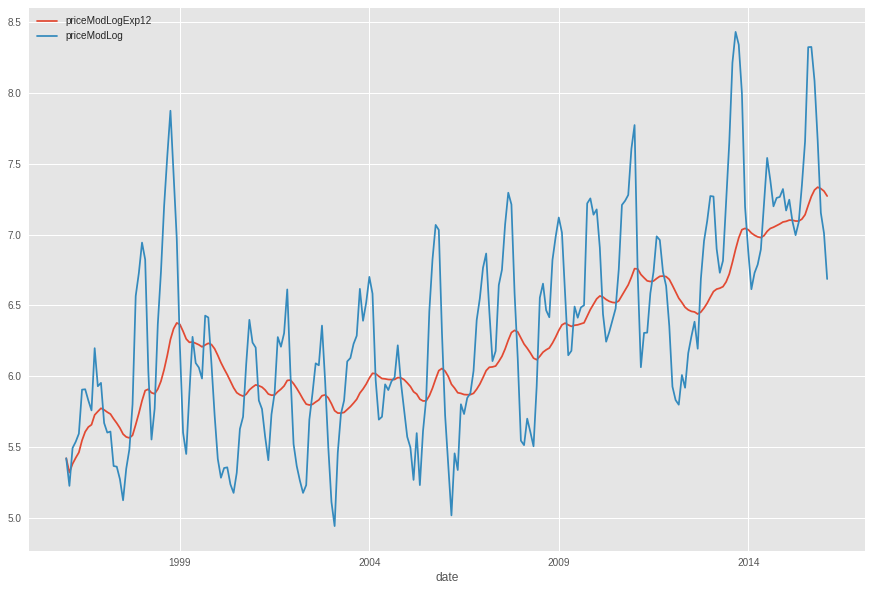

In [0]:
dfls.plot(kind ="line", y=["priceModLogExp12", "priceModLog"])

In [0]:
dfls["priceExp12"] = np.exp(dfls.priceModLogExp12)
dfls.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12,priceMA12,priceModLogExp12,priceExp12
date,,,,,,,,,,,,,,,
2015-10,30532,3248,2015-10-01,8.085795,564.668286,237,1203.533249,4877.213321,8.326033,-0.240238,4130.0,7.494224,1797.628481,7.315908,1504.036136
2015-11,178713,2134,2015-11-01,7.665753,564.668286,238,1211.376792,1536.721884,8.085795,-0.420041,3248.0,7.527467,1858.392982,7.335543,1533.860275
2015-12,438498,1280,2015-12-01,7.154615,564.668286,239,1219.271452,857.805689,7.665753,-0.511138,2134.0,7.513476,1832.572779,7.325388,1518.363214
2016-01,563321,1108,2016-01-01,7.010312,564.668286,240,1227.217561,732.881049,7.154615,-0.144303,1280.0,7.500095,1808.213761,7.307704,1491.748661
2016-02,292870,802,2016-02-01,6.687109,564.668286,241,1235.215457,1135.269599,7.010312,-0.323203,1108.0,7.453430,1725.773152,7.272873,1440.683480


In [0]:
# Root Mean Squared Error (RMSE)
model_Exp12_RMSE = RMSE(dfls.priceExp12, dfls.priceMod)
model_Exp12_RMSE

596.0448751707507

In [0]:
y_exp = dfls.priceModLog[-1]
y_exp

6.687108607866515

In [0]:
y_for = dfls.priceModLogExp12[-1]
y_for

7.272872918957983

In [0]:
model_Exp12_forecast = alpha * y_exp + (1 - alpha) * y_for

In [0]:
dflsResults.loc[4,"Model"] = "Exp Smoothing 12"
dflsResults.loc[4,"Forecast"] = np.exp(model_Exp12_forecast)
dflsResults.loc[4,"RMSE"] = model_Exp12_RMSE
dflsResults.head()

,Model,Forecast,RMSE
0,Mean,564.668,739.761
1,Linear,inf,613.325
2,Random,1108,341.536
3,Moving Average 12,1725.77,558.544
4,Exp Smoothing 12,1394.09,596.045


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


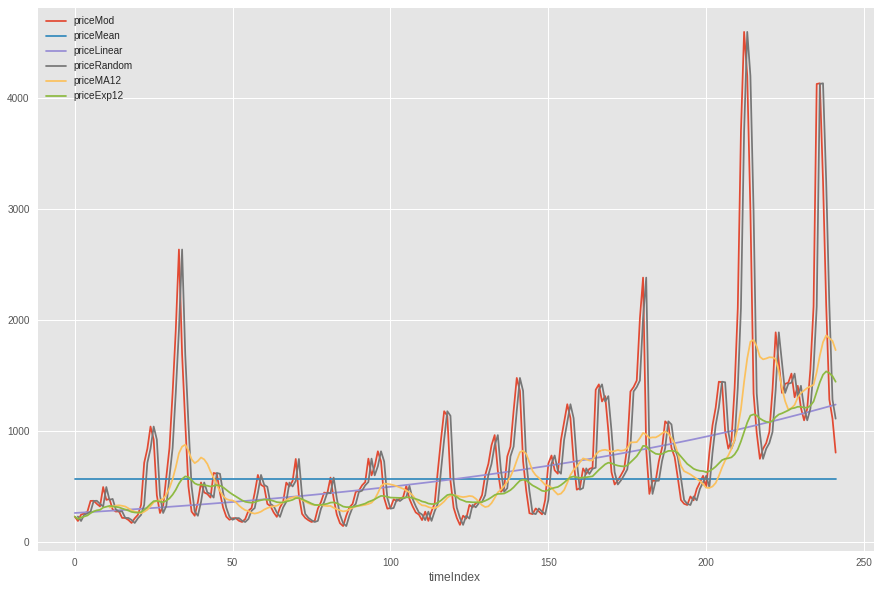

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", 
                                             "priceRandom",
                                             "priceMA12", "priceExp12"])

In [0]:
# Test remaining part for Stationary
ts = dfls.priceModLog - dfls.priceModLogExp12
ts.dropna(inplace = True)

## Eliminating Trend and Seasonality

- Differencing – taking the differece with a particular time lag
- Decomposition – modeling both trend and seasonality and removing them from the model.

## Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. We have already done first order difference earlier

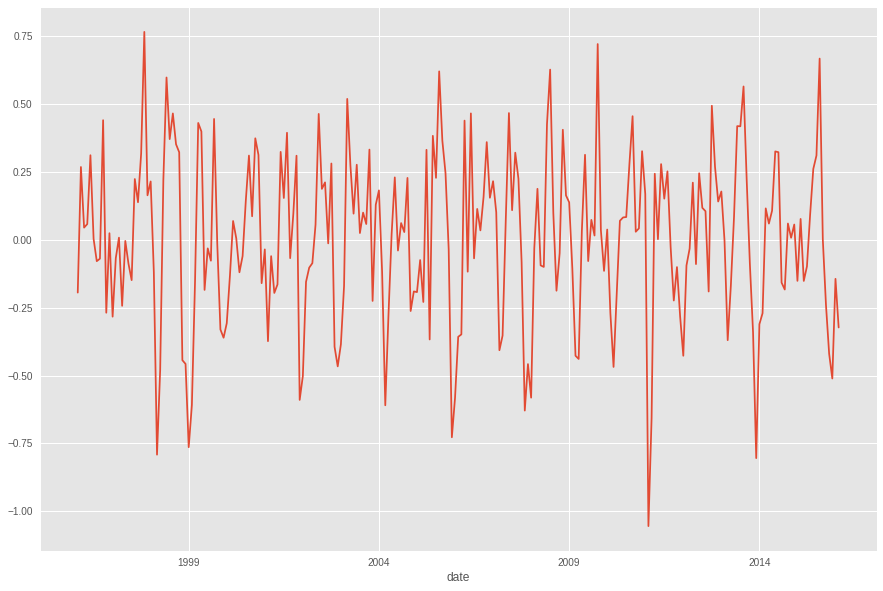

In [0]:
dfls.priceModLogDiff.plot()

In [0]:
# Test remaining part for Stationary
ts = dfls.priceModLogDiff
ts.dropna(inplace = True)

## Time Series Decomposition

We can also decompose the time series into trend and seasonality

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:

dfls.index = dfls.index.to_datetime()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  


In [0]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12,priceMA12,priceModLogExp12,priceExp12
date,,,,,,,,,,,,,,,
1996-01-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325,228.226599,NaN,NaN,NaN,NaN,NaN,5.420535,226.000000
1996-02-01,196164,186,1996-02-01,5.225747,564.668286,1,259.815605,251.668457,5.420535,-0.194788,226.0,NaN,NaN,5.320329,204.451087
1996-03-01,178992,243,1996-03-01,5.493061,564.668286,2,261.508848,269.278771,5.225747,0.267315,186.0,NaN,NaN,5.381262,217.296391
1996-04-01,192592,254,1996-04-01,5.537334,564.668286,3,263.213127,258.514492,5.493061,0.044273,243.0,NaN,NaN,5.423723,226.721663
1996-05-01,237574,269,1996-05-01,5.594711,564.668286,4,264.928512,226.842567,5.537334,0.057377,254.0,NaN,NaN,5.461981,235.563593


In [0]:
decomposition = seasonal_decompose(dfls.priceModLog, model = "additive")

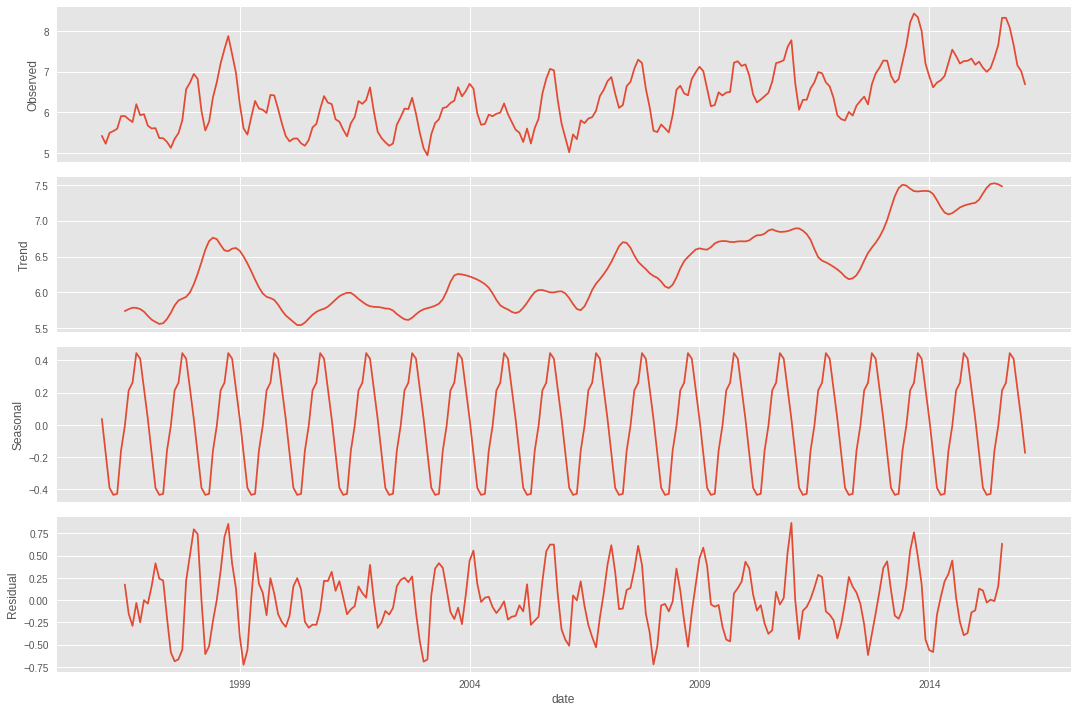

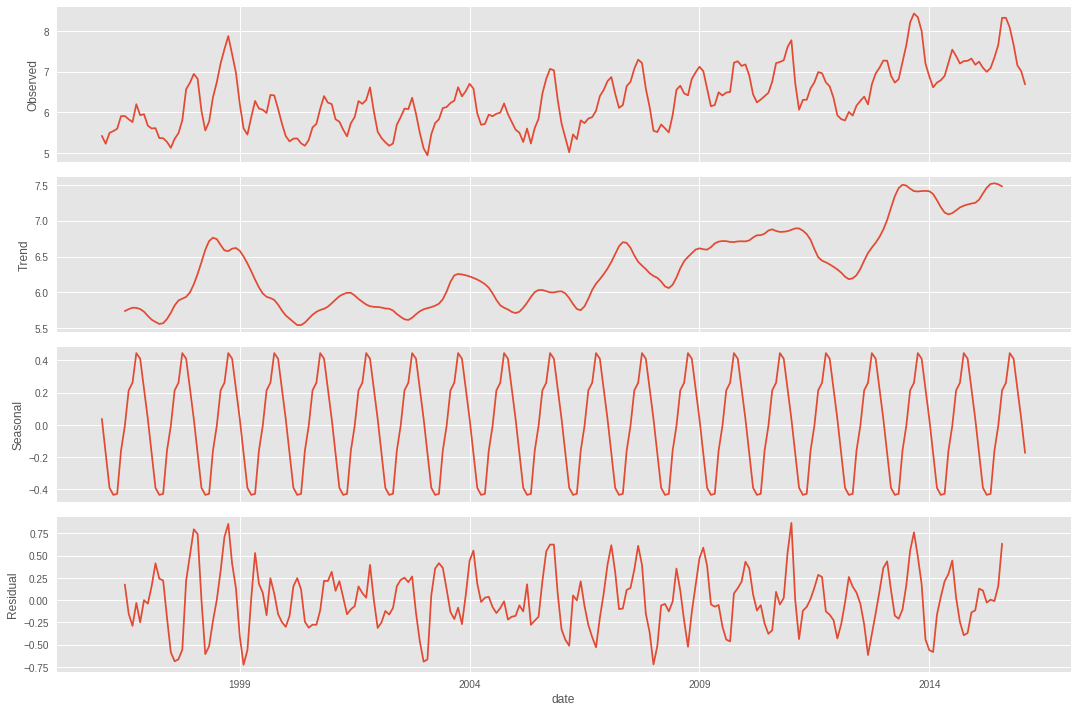

In [0]:
decomposition.plot()

In [0]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [0]:
dfls["priceDecomp"] = np.exp(trend + seasonal)

In [0]:
# Root Mean Squared Error (RMSE)
model_Decomp_RMSE = RMSE(dfls.priceDecomp, dfls.priceMod)
model_Decomp_RMSE

372.59310072075255

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


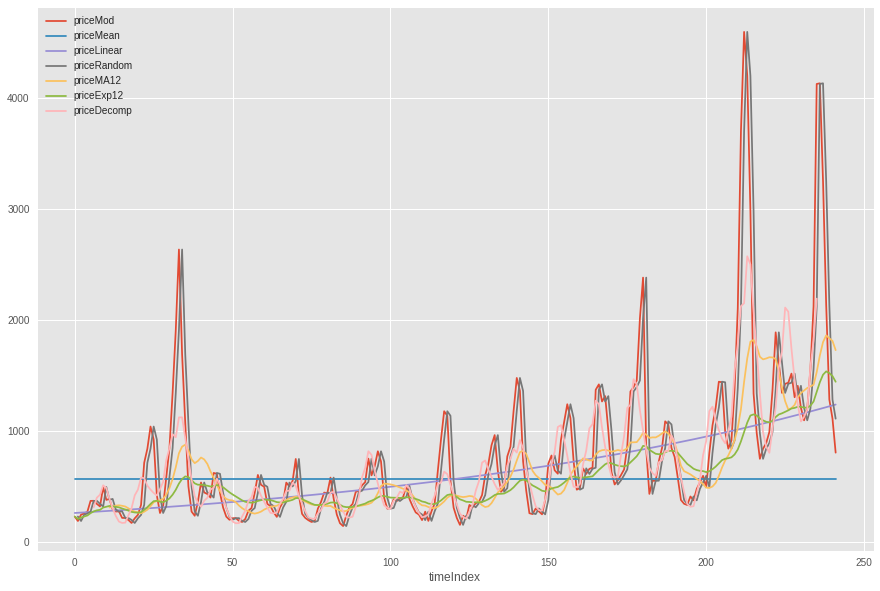

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                             "priceMA12", "priceExp12", "priceDecomp"])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


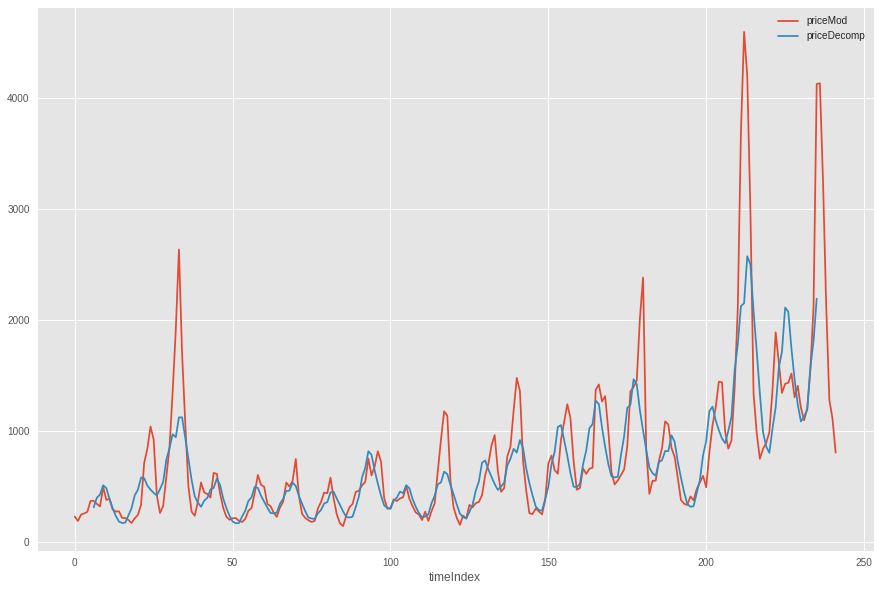

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod",
                                              "priceDecomp"])

In [0]:
# Test remaining part for Stationary
ts = decomposition.resid
ts.dropna(inplace = True)


## Auto Regressive Models - AR(p)

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus an autoregressive model of order (p) can be written as

$$ y_t = c + m_1y_{t-1} + m_2y_{t-2} + m_3y_{t-3} + .. \\$$

**Random walk model is an AR(1) model with ** $$m_1=1,  c = 0\\$$
**Random walk model with drift model ** $$m_1=1,  c \not= 0\\$$

We normally restrict autoregressive models to stationary data, and then some constraints on the values of the parameters are required.

For an AR(1) model:   $$ −1<m_1<−1 \\$$
For an AR(2) model:   
$$ −1<m_2<−1, m_1 + m_2 < 1, m_2 - m_1 <1 \\$$

## Moving Average Model - MA(q)

Rather than use past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

$$ y_t=c+e_t+l_1 e_{t−1}+l_2 e_{t−2} + ... + l_q e_{t-q} \\$$

where `e` is white noise. We refer to this as an MA(`q`) model. Of course, we do not observe the values of e(t), so it is not really regression in the usual sense.

Notice that each value of `y(t)` can be thought of as a weighted moving average of the past few forecast errors. However, moving average models should not be confused with moving average smoothing. A moving average model is used for forecasting future values while moving average smoothing is used for estimating the trend-cycle of past values.

## ARIMA Model

If we combine differencing with autoregression and a moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average model (“integration” in this context is the reverse of differencing). The full model can be written as

- **Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for y(t) will be y(t-1)….y(t-5).
- **Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for y(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- **Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

- **Autocorrelation Function (ACF)**: It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
- **Partial Autocorrelation Function (PACF)**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


In MA model, noise / shock quickly vanishes with time. The AR model has a much lasting effect of the shock.

In [0]:
ts = dfls.priceModLog
ts_diff = dfls.priceModLogDiff
ts_diff.dropna(inplace = True)

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
lag_acf = acf(ts_diff, nlags=20)

In [0]:
lag_acf

array([ 1.        ,  0.41442605,  0.08793707, -0.17962686, -0.28113137,
       -0.37927799, -0.34962856, -0.12771435,  0.01703016,  0.0812846 ,
        0.20965675,  0.19968244,  0.10334137, -0.03616753,  0.02807887,
        0.0056501 , -0.07980779, -0.19672418, -0.1583138 , -0.14761943,
       -0.12390668])

In [0]:
ACF = pd.Series(lag_acf)

In [0]:
ACF

0     1.000000
1     0.414426
2     0.087937
3    -0.179627
4    -0.281131
5    -0.379278
6    -0.349629
7    -0.127714
8     0.017030
9     0.081285
10    0.209657
11    0.199682
12    0.103341
13   -0.036168
14    0.028079
15    0.005650
16   -0.079808
17   -0.196724
18   -0.158314
19   -0.147619
20   -0.123907
dtype: float64

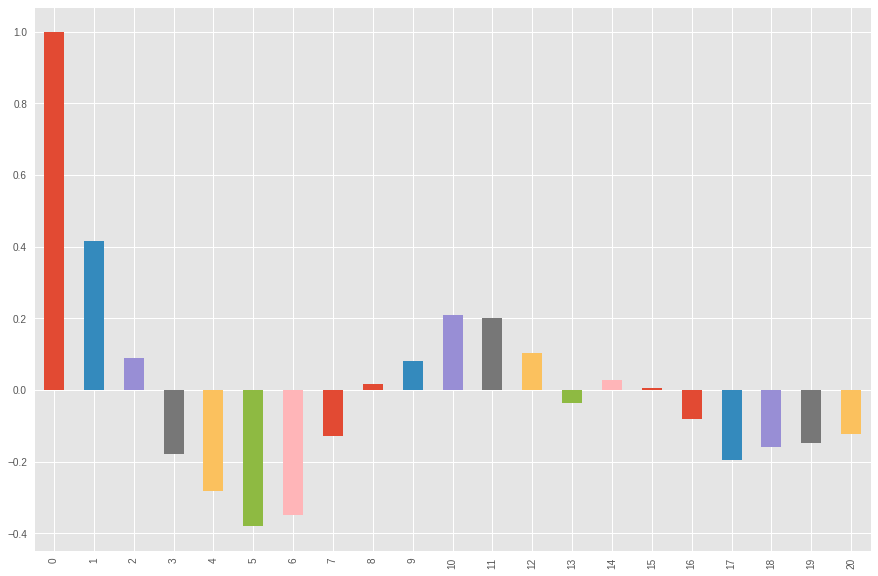

In [0]:
ACF.plot(kind = "bar")

In [0]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

In [0]:
PACF = pd.Series(lag_pacf)

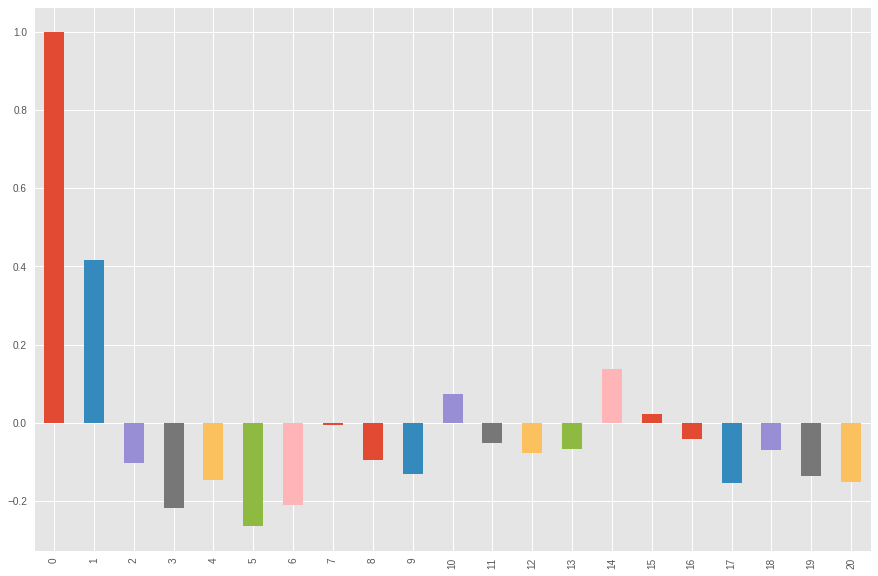

In [0]:
PACF.plot(kind = "bar")

### Running the ARIMA Model 

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
ts_diff.head()

date
1996-02-01   -0.194788
1996-03-01    0.267315
1996-04-01    0.044273
1996-05-01    0.057377
1996-06-01    0.310650
Freq: MS, Name: priceModLogDiff, dtype: float64

In [0]:
# Running the ARIMA Model(1,0,1)
model_AR1MA = ARIMA(ts_diff, order=(1,0,1))

In [0]:
results_ARIMA = model_AR1MA.fit(disp = -1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
results_ARIMA.fittedvalues.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


date
1996-02-01    0.003797
1996-03-01   -0.079250
1996-04-01    0.130271
1996-05-01    0.005648
1996-06-01    0.027170
Freq: MS, dtype: float64

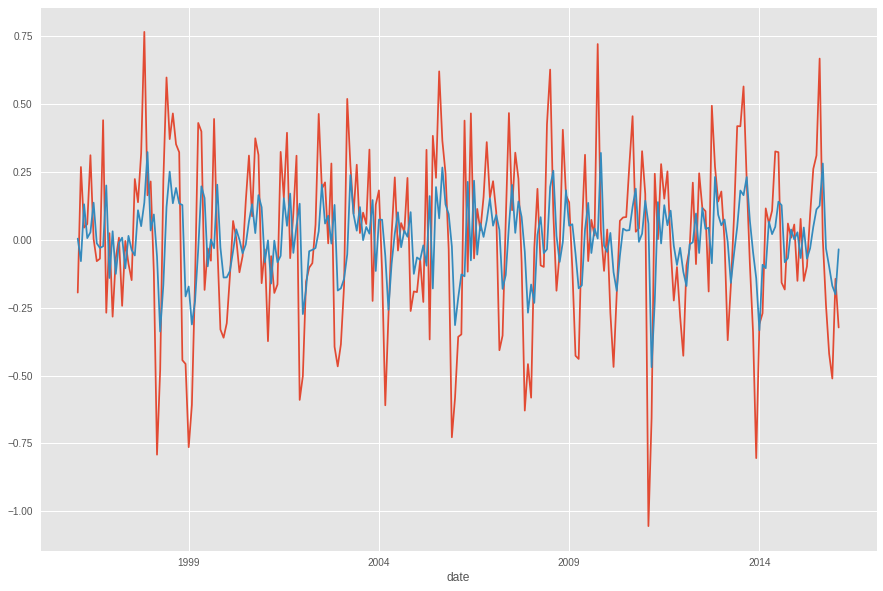

In [0]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [0]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [0]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2015-10-01    7.106269
2015-11-01    7.007095
2015-12-01    6.837166
2016-01-01    6.636042
2016-02-01    6.600484
Freq: MS, dtype: float64

In [0]:
dfls['priceARIMA'] = np.exp(predictions_ARIMA_log)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


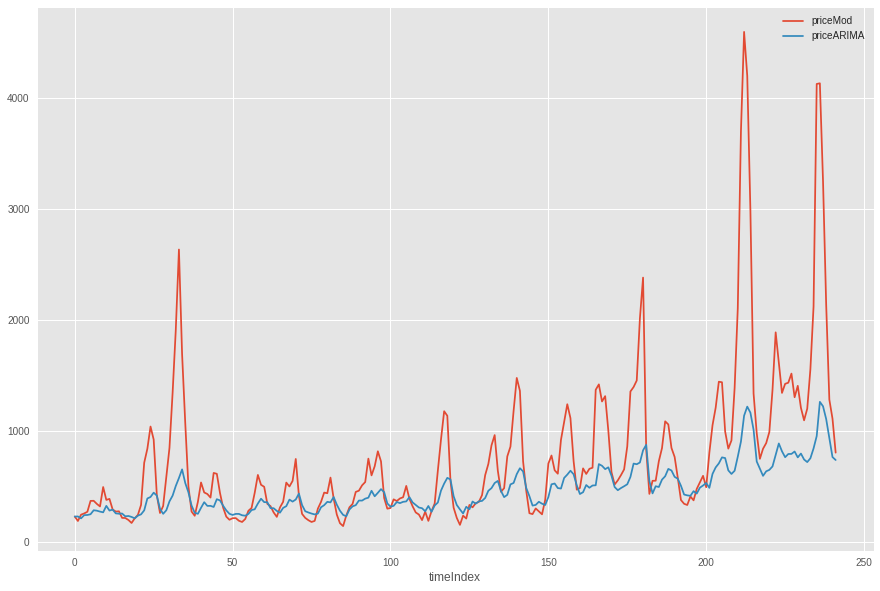

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceARIMA"])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


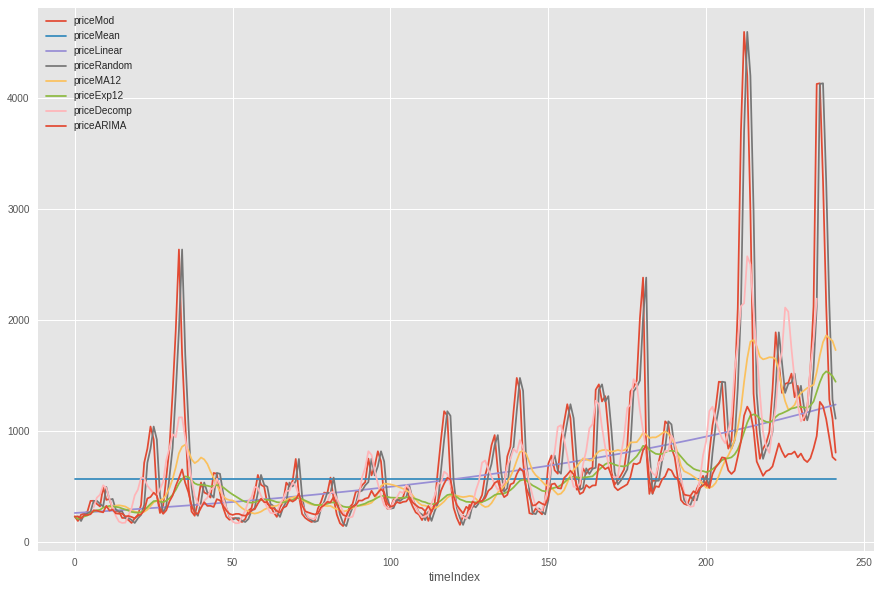

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                             "priceMA12", "priceExp12", "priceDecomp", "priceARIMA"])

In [0]:
model_arima_RMSE = RMSE(dfls.priceARIMA, dfls.priceMean)

In [0]:
dflsResults.loc[3,"Model"] = "Arima"
#df_hyderabad_Results.loc[3,"Forecast"] = np.exp(model_mean_pred_log)
dflsResults.loc[3,"RMSE"] = model_arima_RMSE
dflsResults.head()

,Model,Forecast,RMSE
0,Mean,564.668,739.761
1,Linear,inf,613.325
2,Random,1108,341.536
3,Arima,1725.77,231.19
4,Exp Smoothing 12,1394.09,596.045


In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
n=10
Data = series_to_supervised(dfls.priceMod.values.reshape(-1,1),n)
X=Data.values[:, :n]
y=Data.values[:, n]

In [0]:
from joblib import dump, load

In [0]:
mlpr = load('ts_mlpr.joblib')
mlpr

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25, 25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       n_iter_no_change=None, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
ypred = mlpr.predict(X)

In [0]:
RMSE_MLP = RMSE(pd.Series(mlpr.predict(X)),pd.Series(y))

In [0]:
dfls['priceMLP'] = np.append(np.zeros(10),ypred)

In [0]:
dfls.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12,priceMA12,priceModLogExp12,priceExp12,priceDecomp,priceARIMA,priceMLP
date,,,,,,,,,,,,,,,,,,
1996-01-01,225063,226,1996-01-01,5.420535,564.668286,0,258.133325,228.226599,NaN,NaN,NaN,NaN,NaN,5.420535,226.000000,NaN,226.000000,0.0
1996-02-01,196164,186,1996-02-01,5.225747,564.668286,1,259.815605,251.668457,5.420535,-0.194788,226.0,NaN,NaN,5.320329,204.451087,NaN,226.859828,0.0
1996-03-01,178992,243,1996-03-01,5.493061,564.668286,2,261.508848,269.278771,5.225747,0.267315,186.0,NaN,NaN,5.381262,217.296391,NaN,209.575126,0.0
1996-04-01,192592,254,1996-04-01,5.537334,564.668286,3,263.213127,258.514492,5.493061,0.044273,243.0,NaN,NaN,5.423723,226.721663,NaN,238.734878,0.0
1996-05-01,237574,269,1996-05-01,5.594711,564.668286,4,264.928512,226.842567,5.537334,0.057377,254.0,NaN,NaN,5.461981,235.563593,NaN,240.087139,0.0


In [0]:
dflsResults.loc[5,"Model"] = "MLP"
#df_hyderabad_Results.loc[3,"Forecast"] = np.exp(model_mean_pred_log)
dflsResults.loc[5,"RMSE"] = RMSE_MLP
dflsResults

,Model,Forecast,RMSE
0,Mean,564.668,739.761
1,Linear,inf,613.325
2,Random,1108,341.536
3,Arima,1725.77,231.19
4,Exp Smoothing 12,1394.09,596.045
5,MLP,NaN,232.322


In [0]:
dflsResults = dflsResults.sort_values(by='RMSE')

In [0]:
from google.colab import files

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


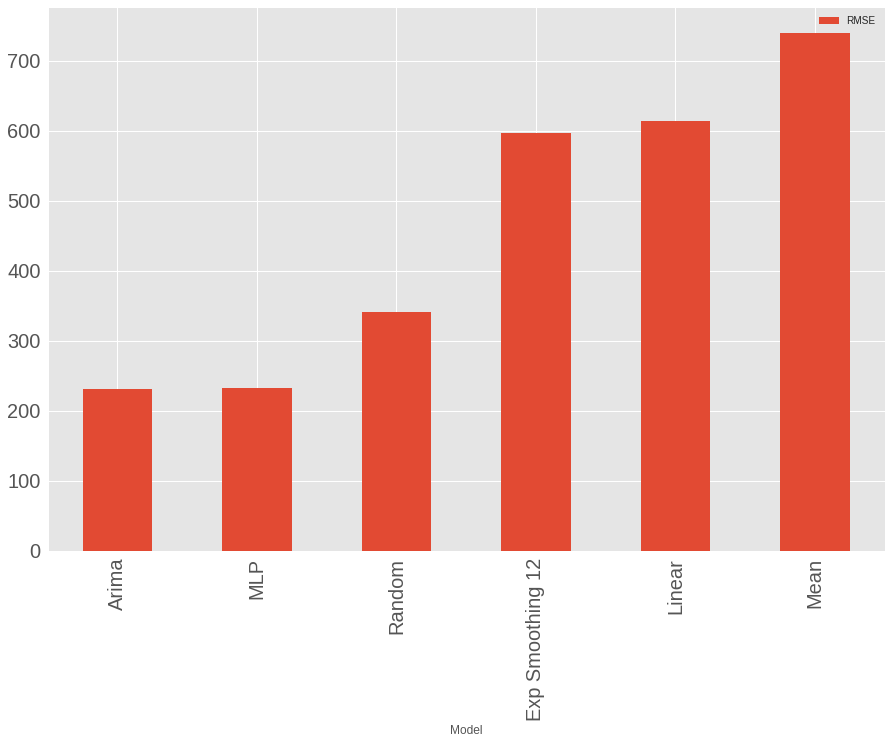

In [0]:
dflsResults.plot(kind="bar", x="Model", y = ["RMSE"])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('ModelvsRMSE.png')
files.download('ModelvsRMSE.png')


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


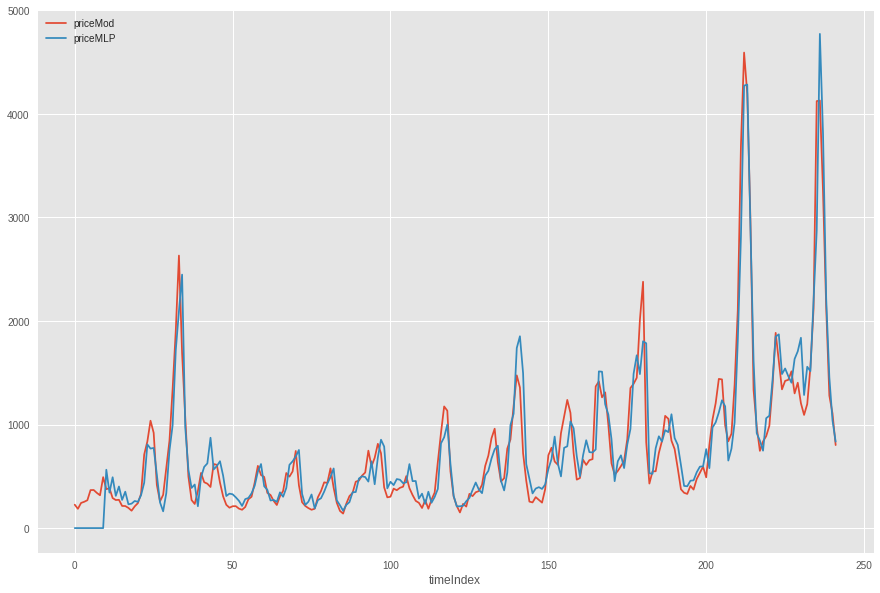

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMLP"]) #, "priceMLP"])
plt.savefig('MLP_prediction.png')
files.download('MLP_prediction.png')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


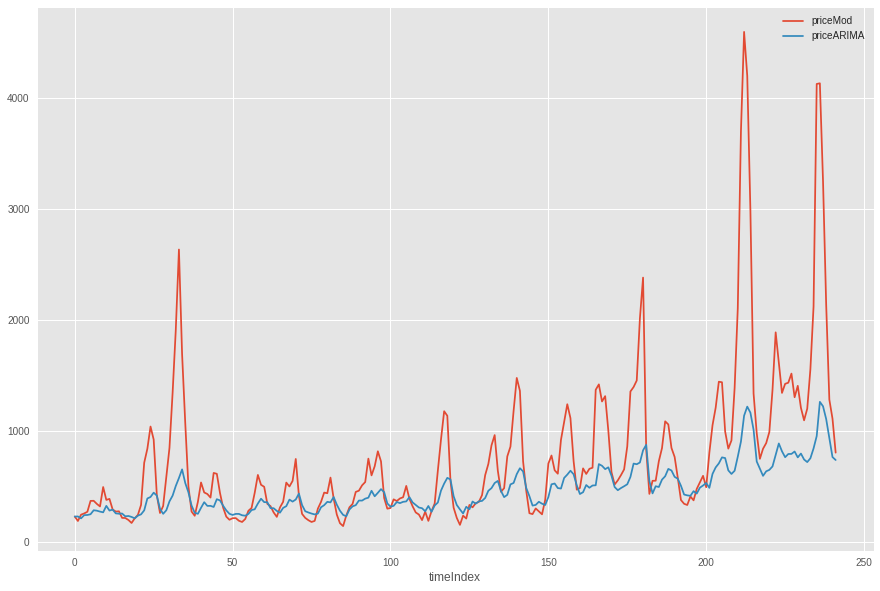

In [0]:
dfls.plot(kind="line", x="timeIndex", y = ["priceMod", "priceARIMA"]) #, "priceMLP"])
plt.savefig('ARIMA_prediction.png')
files.download('ARIMA_prediction.png')

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 38460
Date of submission:  09 Mar 2019
Time of submission:  12:38:55
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
